In [185]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import scipy.optimize as so

[2.76486493706294e-14 8.73069338170347e-14 8.22068258019802e-14
 2.54689859079755e-13 3.77404063909091e-13 9.97943438221154e-14
 2.07572235150000e-13 7.88648310030395e-14 9.43510160000000e-14
 1.00606938348197e-13 1.02758532277228e-13]
[2.76486493706294e-11 2.75889910861830e-11 8.22068258019802e-12
 8.04819954692025e-12 3.77404063909091e-12 3.15350126477885e-13
 2.07572235150000e-13 2.49212865969605e-14 9.43510160000000e-15
 3.17917925180302e-15 1.02758532277228e-15]
[1000.00000000000 316.000000000000 100.000000000000 31.6000000000000
 10.0000000000000 3.16000000000000 1.00000000000000 0.316000000000000
 0.100000000000000 0.0316000000000000 0.0100000000000000]


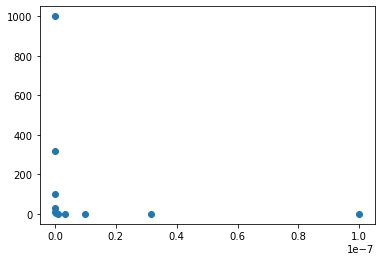

In [186]:
kd = 1e-10 #dissocation constant for binder measured in titration (Nb-ALFA)
s_conc = np.array([27.67629802, 27.67629802, 8.302889406, 8.302889406, 4.151444703, 0.4151444703, 0.4151444703, 0.1037861176, 0.1037861176, 0.1037861176, 0.1037861176])
b_conc = np.array([100000, 31600, 10000, 3160, 1000, 316, 100, 31.6, 10, 3.16, 1])
vol = np.array([0.15, 0.15, 0.5, 0.5, 1, 10, 10, 40, 40, 40, 40])

#convert from pM to M
s_conc = s_conc * 1e-12
b_conc = b_conc * 1e-12
vol = vol*1e3

#solve for concentrations of each switch state
s2, s2b = sp.symbols('s2, s2b')
s2_conc = np.array([])
s2b_conc = np.array([])
for i in range(0, len(s_conc)):
    eq1= sp.Eq(s2+s2b, s_conc[i]) 
    eq2 = sp.Eq((s2*b_conc[i])/s2b, kd)
    output = sp.solve((eq1, eq2), (s2, s2b,))

    s2_conc = np.append(s2_conc, output[s2])
    s2b_conc = np.append(s2b_conc, output[s2b])


print(s2_conc)
print(s2b_conc)



# s2, s2b, b = sp.symbols('s2, s2b, b')
# s2_conc = np.array([])
# s2b_conc = np.array([])
# free_b_conc = np.array([])

# eq1= sp.Eq(s2+s2b, s_conc[6]) 
# eq2 = sp.Eq(b+s2b, b_conc[6])
# eq3 = sp.Eq((s2*b)/s2b, kd)
# output = sp.solve((eq1, eq2, eq3), (s2, s2b, b))
# print(output)
# print(output[1])








# print(s2b_conc)
# print(s2b_conc/s_conc)

# s2b_conc_1 = kd*s_conc*b_conc
# print(s2b_conc_1)
# print(s_conc)

s2b_frac  = s2b_conc/s2_conc
print(s2b_frac)

#plt.scatter(np.sort(b_conc), s2b_conc_1[::-1])
plt.scatter(b_conc[::-1], s2b_frac)
#plt.xscale('log')
plt.show()

The overall observed equilibrium between two switch states with one binder site is the product of two equations and their associated equilibrium constants:

S1 <-> S2, Ks = ?
S2 + B <-> S2B, Kd =  1e-10

Where S1 is switch state 1 (binding site buried), S2 is switch state 2 (binding site exposed), the equilibrium constant, Ks, between which is not known for designs. 
B is binder (eg Nb-ALFA), and S2B the switch 2 state bound to the binder, with the equilibrium constant here being the example measured Kd for Nb-ALFA binding to ALFA tag on yeast of ~100 pM (expressed here in M).

The overall observed Keq = Ks * Kd, or:

Keq = [S2]/[S1] * [S2B]/[S2][B] = [S2B]/[S1][B]

First, we will consider a case where the two switch states are at equal concentration at equilibrium, or Ks = 1. 

We will first calculate the concentration of S1 and S2 across a typical titration curve performed for a tite-seq experiment. (Per Wittrup protocols, assume 50,000 design molecules displayed on yeast surface and 50,000 yeast in various labeling volumes for each reaction to maintain binder in molar excess and avoid ligand depletion.)

In [187]:
#design concentrations from tite-seq experiment setup
s_conc = np.array([27.67629802, 27.67629802, 8.302889406, 8.302889406, 4.151444703, 0.4151444703, 0.4151444703, 0.1037861176, 0.1037861176, 0.1037861176, 0.1037861176])
b_conc = np.array([100000, 31600, 10000, 3160, 1000, 316, 100, 31.6, 10, 3.16, 1])
kd = 1/1e-10 #dissocation constant for binder measured in titration (Nb-ALFA)
kd2 = 1/5e-7 #dissociation constant for binder added in excess to lock switch state (myc)
m_conc = 1.6e-9 #concantration of binder added in excess (M) (myc 9B11 1:100 from 25 ug/mL stock)
ks = 1 #equilibrium constant for switch states [s2]/[s1]

#convert from pM to M
s_conc = s_conc * 1e-12
b_conc = b_conc * 1e-12

#solve for concentrations of each switch state
s1, s2 = sp.symbols('s1, s2')
s1_conc = np.array([])
s2_conc = np.array([])
for i in range(0, len(s_conc)):
    eq1= sp.Eq(s1+s2, s_conc[i]) 
    eq2 = sp.Eq(s2/s1, ks)
    output = sp.solve((eq1, eq2), (s1, s2))

    s1_conc = np.append(s1_conc, output[s1])
    s2_conc = np.append(s2_conc, output[s2])

#solve for concentrations of each bound state s2b
s2b_conc_1 = kd*s1_conc*b_conc
print(s2b_conc_1)
print(s_conc)
frac_sat = s2b_conc_1/s2_conc
print(s2b_conc_1/s2_conc)



[1.38381490100000e-8 4.37285508716000e-9 4.15144470300000e-10
 1.31185652614800e-10 2.07572235150000e-11 6.55928263074000e-13
 2.07572235150000e-13 1.63982065808000e-14 5.18930588000000e-15
 1.63982065808000e-15 5.18930588000000e-16]
[2.76762980e-11 2.76762980e-11 8.30288941e-12 8.30288941e-12
 4.15144470e-12 4.15144470e-13 4.15144470e-13 1.03786118e-13
 1.03786118e-13 1.03786118e-13 1.03786118e-13]
[1000.00000000000 316.000000000000 100.000000000000 31.6000000000000
 10.0000000000000 3.16000000000000 1.00000000000000 0.316000000000000
 0.100000000000000 0.0316000000000000 0.0100000000000000]


Now repeating for two binder situation when states are equally favored. 

In [188]:
#solve for concentrations of each switch state
s1, s2 = sp.symbols('s1, s2')
s1_conc = np.array([])
s2_conc = np.array([])
for i in range(0, len(s_conc)):
    eq1= sp.Eq(s1+s2, s_conc[i]) 
    eq2 = sp.Eq(s2/s1, ks)
    output = sp.solve((eq1, eq2), (s1, s2))

    s1_conc = np.append(s1_conc, output[s1])
    s2_conc = np.append(s2_conc, output[s2])

s1m_conc = kd2*m_conc*s1_conc
print(s1_conc)
print(s2_conc)

s2b_conc_2 = (((ks*kd/kd2)*s1m_conc*b_conc)/m_conc)
print(s2b_conc_2)

[1.38381490100000e-11 1.38381490100000e-11 4.15144470300000e-12
 4.15144470300000e-12 2.07572235150000e-12 2.07572235150000e-13
 2.07572235150000e-13 5.18930588000000e-14 5.18930588000000e-14
 5.18930588000000e-14 5.18930588000000e-14]
[1.38381490100000e-11 1.38381490100000e-11 4.15144470300000e-12
 4.15144470300000e-12 2.07572235150000e-12 2.07572235150000e-13
 2.07572235150000e-13 5.18930588000000e-14 5.18930588000000e-14
 5.18930588000000e-14 5.18930588000000e-14]
[1.38381490100000e-8 4.37285508716000e-9 4.15144470300000e-10
 1.31185652614800e-10 2.07572235150000e-11 6.55928263074000e-13
 2.07572235150000e-13 1.63982065808000e-14 5.18930588000000e-15
 1.63982065808000e-15 5.18930588000000e-16]


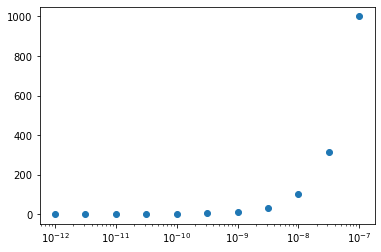

In [189]:
#test_x = np.array([5042.2, 1253.9, 422.8, 365.4, 334.3, 368.5, 346.6, 376.1, 356.4, 411.8, 300])
#plt.scatter(np.sort(10**-b_conc), test_x[::-1])
plt.scatter(np.sort(b_conc), frac_sat[::-1])
#plt.scatter(np.sort(b_conc), s2b_conc_1[::-1])
#plt.scatter(np.sort(b_conc), s2b_conc_2[::-1])
plt.xscale('log')
plt.show()

Now repeating for a situation in which S2 is moderately favored over S1. 

In [190]:
ks = 5

#solve for concentrations of each switch state
s1, s2 = sp.symbols('s1, s2')
s1_conc = np.array([])
s2_conc = np.array([])
for i in range(0, len(s_conc)):
    eq1= sp.Eq(s1+s2, s_conc[i]) 
    eq2 = sp.Eq(s2/s1, ks)
    output = sp.solve((eq1, eq2), (s1, s2))

    s1_conc = np.append(s1_conc, output[s1])
    s2_conc = np.append(s2_conc, output[s2])

print(s1_conc) #something going wrong here should not be the same as s2_conc
print(s2_conc)
#solve for concentrations of each bound state s2b
s2b_conc_1 = kd*s1_conc*b_conc

#solve for concentrations of each switch state
s1, s2 = sp.symbols('s1, s2')
s1_conc = np.array([])
s2_conc = np.array([])
for i in range(0, len(s_conc)):
    eq1= sp.Eq(s1+s2, s_conc[i]) 
    eq2 = sp.Eq(s2/s1, ks)
    output = sp.solve((eq1, eq2), (s1, s2))

    s1_conc = np.append(s1_conc, output[s1])
    s2_conc = np.append(s2_conc, output[s2])

s1m_conc = kd2*m_conc*s1_conc
print(s1m_conc)

s2b_conc_2 = ((((1/kd2)*ks*kd)*s1m_conc*b_conc)/m_conc)
print(s2b_conc_2)

[4.61271633666667e-12 4.61271633666667e-12 1.38381490100000e-12
 1.38381490100000e-12 6.91907450500000e-13 6.91907450500000e-14
 6.91907450500000e-14 1.72976862666667e-14 1.72976862666667e-14
 1.72976862666667e-14 1.72976862666667e-14]
[2.30635816833333e-11 2.30635816833333e-11 6.91907450500000e-12
 6.91907450500000e-12 3.45953725250000e-12 3.45953725250000e-13
 3.45953725250000e-13 8.64884313333333e-14 8.64884313333333e-14
 8.64884313333333e-14 8.64884313333333e-14]
[1.47606922773333e-14 1.47606922773333e-14 4.42820768320000e-15
 4.42820768320000e-15 2.21410384160000e-15 2.21410384160000e-16
 2.21410384160000e-16 5.53525960533333e-17 5.53525960533333e-17
 5.53525960533333e-17 5.53525960533333e-17]
[2.30635816833333e-8 7.28809181193333e-9 6.91907450500000e-10
 2.18642754358000e-10 3.45953725250000e-11 1.09321377179000e-12
 3.45953725250000e-13 2.73303443013333e-14 8.64884313333333e-15
 2.73303443013333e-15 8.64884313333333e-16]


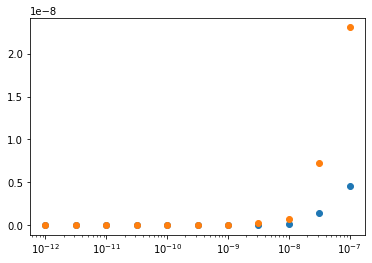

In [191]:
plt.clf()
plt.scatter(np.sort(b_conc), s2b_conc_1[::-1])
plt.scatter(np.sort(b_conc), s2b_conc_2[::-1])
plt.xscale('log')
plt.show()

Now repeating for situation in which S2 is greatly favored over S1. 

In [192]:
ks = 1e20

#solve for concentrations of each switch state
s1, s2 = sp.symbols('s1, s2')
s1_conc = np.array([])
s2_conc = np.array([])
for i in range(0, len(s_conc)):
    eq1= sp.Eq(s1+s2, s_conc[i]) 
    eq2 = sp.Eq(s2/s1, ks)
    output = sp.solve((eq1, eq2), (s1, s2))

    s1_conc = np.append(s1_conc, output[s1])
    s2_conc = np.append(s2_conc, output[s2])

print(s1_conc) #something going wrong here should not be the same as s2_conc
print(s2_conc)
#solve for concentrations of each bound state s2b
s2b_conc_1 = kd*s1_conc*b_conc

#solve for concentrations of each switch state
s1, s2 = sp.symbols('s1, s2')
s1_conc = np.array([])
s2_conc = np.array([])
for i in range(0, len(s_conc)):
    eq1= sp.Eq(s1+s2, s_conc[i]) 
    eq2 = sp.Eq(s2/s1, ks)
    output = sp.solve((eq1, eq2), (s1, s2))

    s1_conc = np.append(s1_conc, output[s1])
    s2_conc = np.append(s2_conc, output[s2])

s1m_conc = kd2*m_conc*s1_conc
print(s1m_conc)

s2b_conc_2 = ((((1/kd2)*ks*kd)*s1m_conc*b_conc)/m_conc)


[2.76762980200000e-31 2.76762980200000e-31 8.30288940600000e-32
 8.30288940600000e-32 4.15144470300000e-32 4.15144470300000e-33
 4.15144470300000e-33 1.03786117600000e-33 1.03786117600000e-33
 1.03786117600000e-33 1.03786117600000e-33]
[2.76762980200000e-11 2.76762980200000e-11 8.30288940600000e-12
 8.30288940600000e-12 4.15144470300000e-12 4.15144470300000e-13
 4.15144470300000e-13 1.03786117600000e-13 1.03786117600000e-13
 1.03786117600000e-13 1.03786117600000e-13]
[8.85641536640000e-34 8.85641536640000e-34 2.65692460992000e-34
 2.65692460992000e-34 1.32846230496000e-34 1.32846230496000e-35
 1.32846230496000e-35 3.32115576320000e-36 3.32115576320000e-36
 3.32115576320000e-36 3.32115576320000e-36]


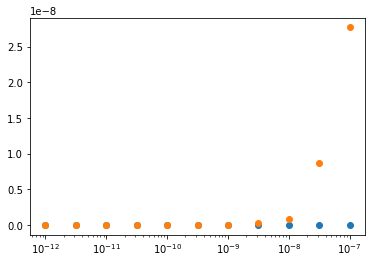

In [193]:
plt.clf()
plt.scatter(np.sort(b_conc), s2b_conc_1[::-1])
plt.scatter(np.sort(b_conc), s2b_conc_2[::-1])
plt.xscale('log')
plt.show()

Now repeating for a situation in which S1 greatly favored over S2. 

In [194]:
ks = 1e-20

#solve for concentrations of each switch state
s1, s2 = sp.symbols('s1, s2')
s1_conc = np.array([])
s2_conc = np.array([])
for i in range(0, len(s_conc)):
    eq1= sp.Eq(s1+s2, s_conc[i]) 
    eq2 = sp.Eq(s2/s1, ks)
    output = sp.solve((eq1, eq2), (s1, s2))

    s1_conc = np.append(s1_conc, output[s1])
    s2_conc = np.append(s2_conc, output[s2])

print(s1_conc) #something going wrong here should not be the same as s2_conc
print(s2_conc)
#solve for concentrations of each bound state s2b
s2b_conc_1 = kd*s1_conc*b_conc

#solve for concentrations of each switch state
s1, s2 = sp.symbols('s1, s2')
s1_conc = np.array([])
s2_conc = np.array([])
for i in range(0, len(s_conc)):
    eq1= sp.Eq(s1+s2, s_conc[i]) 
    eq2 = sp.Eq(s2/s1, ks)
    output = sp.solve((eq1, eq2), (s1, s2))

    s1_conc = np.append(s1_conc, output[s1])
    s2_conc = np.append(s2_conc, output[s2])

s1m_conc = kd2*m_conc*s1_conc
print(s1m_conc)

s2b_conc_2 = ((((1/kd2)*ks*kd)*s1m_conc*b_conc)/m_conc)

[2.76762980200000e-11 2.76762980200000e-11 8.30288940600000e-12
 8.30288940600000e-12 4.15144470300000e-12 4.15144470300000e-13
 4.15144470300000e-13 1.03786117600000e-13 1.03786117600000e-13
 1.03786117600000e-13 1.03786117600000e-13]
[2.76762980200000e-31 2.76762980200000e-31 8.30288940600000e-32
 8.30288940600000e-32 4.15144470300000e-32 4.15144470300000e-33
 4.15144470300000e-33 1.03786117600000e-33 1.03786117600000e-33
 1.03786117600000e-33 1.03786117600000e-33]
[8.85641536640000e-14 8.85641536640000e-14 2.65692460992000e-14
 2.65692460992000e-14 1.32846230496000e-14 1.32846230496000e-15
 1.32846230496000e-15 3.32115576320000e-16 3.32115576320000e-16
 3.32115576320000e-16 3.32115576320000e-16]


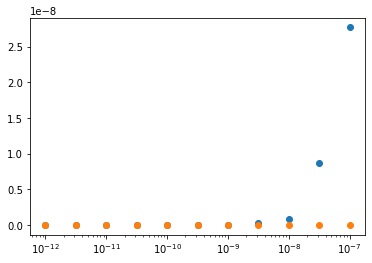

In [195]:
plt.clf()
plt.scatter(np.sort(b_conc), s2b_conc_1[::-1])
plt.scatter(np.sort(b_conc), s2b_conc_2[::-1])
plt.xscale('log')
plt.show()